In [1]:
!pip install sentence-transformers umap-learn pandas scikit-learn

In [2]:
import pandas as pd
df=pd.read_csv("Filmreviews_with_neutral.csv")

In [3]:
df

,Review,Sentiment
0,This film was fine. The plot was average and t...,neutral
1,This film was poor. The plot was poor and the ...,negative
2,A excellent experience. The narrative was fant...,positive
3,This film was poor. The plot was boring and th...,negative
4,A brilliant experience. The narrative was exce...,positive
...,...,...
1268,"Absolutely fine. The actors did a neutral job,...",neutral
1269,A dull experience. The narrative was terrible ...,negative
1270,"I hated this movie! The acting was boring, and...",negative
1271,Absolutely terrible! The actors did a boring j...,negative


In [4]:
df['Sentiment'].value_counts()

Sentiment
positive    518
negative    482
neutral     273
Name: count, dtype: int64

In [5]:
df['Review'].value_counts()

Review
A fantastic experience. The narrative was loved and the visuals were wonderful.           6
A boring experience. The narrative was hated and the visuals were disappointing.          5
I outstanding this movie! The acting was fantastic, and the story was wonderful.          4
I boring this movie! The acting was terrible, and the story was boring.                   4
Absolutely wonderful! The actors did a fantastic job, and the direction was fantastic.    4
                                                                                         ..
This film was passable. The plot was decent and the performances were decent.             1
Absolutely poor! The actors did a awful job, and the direction was terrible.              1
I neutral this movie. The acting was passable, and the story was okay.                    1
A neutral experience. The narrative was okay and the visuals were average.                1
Absolutely dull! The actors did a awful job, and the direction was boring

In [6]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

df["embeddings"] = df["Review"].apply(lambda x: model.encode(x))

C:\Users\saisw\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df

,Review,Sentiment,embeddings
0,This film was fine. The plot was average and t...,neutral,"[0.026686512, -0.014796092, -0.021650208, -0.0..."
1,This film was poor. The plot was poor and the ...,negative,"[0.047682516, 0.0055205394, 0.029651597, 0.055..."
2,A excellent experience. The narrative was fant...,positive,"[-0.015009146, 0.058166604, -0.011737845, 0.00..."
3,This film was poor. The plot was boring and th...,negative,"[0.0491451, 0.038385015, 0.023642795, 0.047759..."
4,A brilliant experience. The narrative was exce...,positive,"[-0.011093559, 0.06354681, -0.015823368, -0.02..."
...,...,...,...
1268,"Absolutely fine. The actors did a neutral job,...",neutral,"[-0.036597893, -0.03725716, -0.0050155506, -0...."
1269,A dull experience. The narrative was terrible ...,negative,"[0.020386424, 0.030361474, 0.0109566655, 0.053..."
1270,"I hated this movie! The acting was boring, and...",negative,"[0.021311417, 0.049485184, 0.0119813625, 0.056..."
1271,Absolutely terrible! The actors did a boring j...,negative,"[0.010350495, -0.0096804155, 0.029523874, -0.0..."


In [14]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 3
sentiment_clusters = {}

for sentiment in df["Sentiment"].unique():
    subset = df[df["Sentiment"] == sentiment]
    X = np.vstack(subset["embeddings"].values)
    kmeans = KMeans(n_clusters=min(num_clusters, len(subset)), random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    df.loc[df["Sentiment"] == sentiment, "cluster"] = clusters

    cluster_map = {}
    for i in range(num_clusters):
        phrases = subset.iloc[np.where(clusters == i)]["Review"].tolist()
        if phrases:
            cluster_map[i] = phrases[:3]

    sentiment_clusters[sentiment] = cluster_map


In [15]:
for sentiment, clusters in sentiment_clusters.items():
    print(f"\n🔹 Sentiment: {sentiment}")
    for cluster_id, phrases in clusters.items():
        print(f"   Cluster {cluster_id}: {phrases}")


🔹 Sentiment: neutral
   Cluster 0: ['This film was fine. The plot was average and the performances were average.', 'I neutral this movie. The acting was decent, and the story was okay.', 'I okay this movie. The acting was average, and the story was passable.']
   Cluster 1: ['A fine experience. The narrative was decent and the visuals were okay.', 'A fine experience. The narrative was passable and the visuals were okay.', 'A passable experience. The narrative was decent and the visuals were neutral.']
   Cluster 2: ['decent movie with passable storytelling and neutral characters.', 'passable movie with passable storytelling and mediocre characters.', 'fine movie with passable storytelling and okay characters.']

🔹 Sentiment: negative
   Cluster 0: ['A terrible experience. The narrative was dull and the visuals were terrible.', 'A terrible experience. The narrative was hated and the visuals were awful.', 'A hated experience. The narrative was hated and the visuals were hated.']
   Clus

In [20]:
!pip install wordcloud

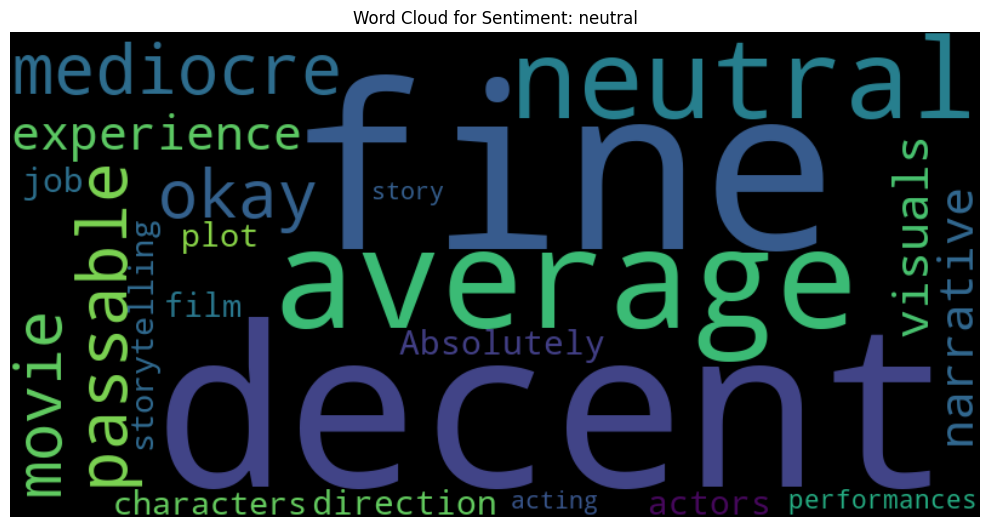

Word cloud for sentiment 'neutral' saved at: wordcloud_images\neutral_wordcloud.png


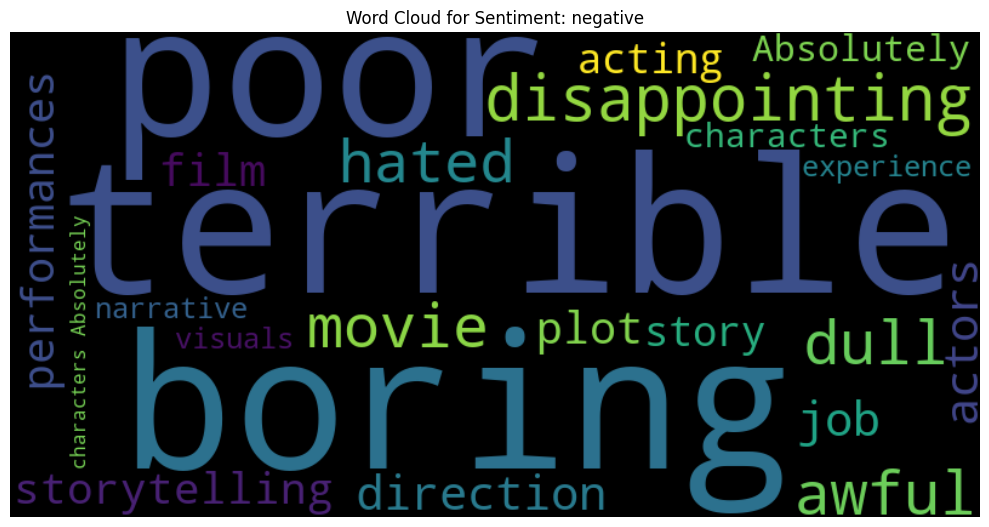

Word cloud for sentiment 'negative' saved at: wordcloud_images\negative_wordcloud.png


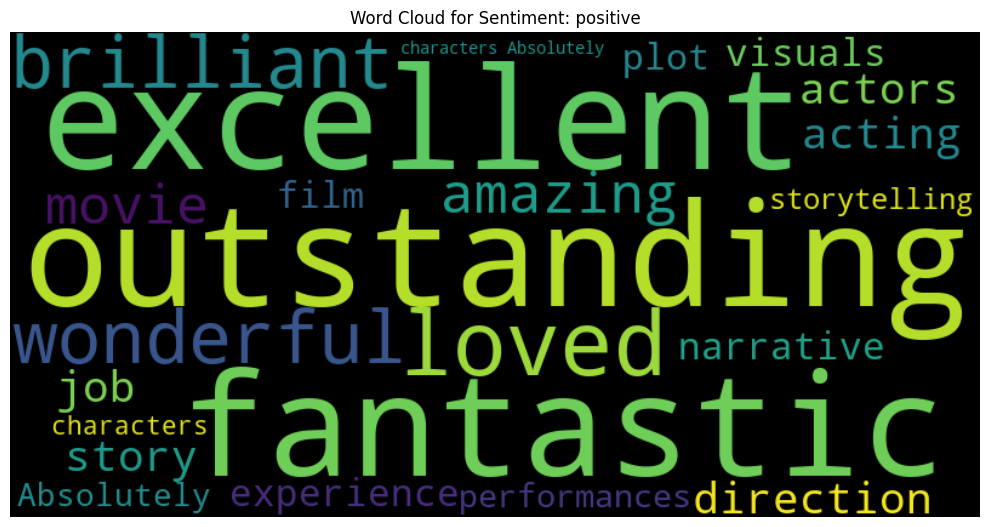

Word cloud for sentiment 'positive' saved at: wordcloud_images\positive_wordcloud.png


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import os

output_dir = "wordcloud_images"
os.makedirs(output_dir, exist_ok=True)

cluster_map_df = df[['Sentiment', 'cluster', 'Review']].copy()

wordcloud_dict = {}

for sentiment in df["Sentiment"].unique():
    subset = cluster_map_df[cluster_map_df["Sentiment"] == sentiment]
    sentiment_reviews = " ".join(subset["Review"].values)
    wordcloud_dict[sentiment] = sentiment_reviews

for sentiment, reviews in wordcloud_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(reviews)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    
    filename = f"{sentiment}_wordcloud.png"
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path)
    plt.show()

    print(f"Word cloud for sentiment '{sentiment}' saved at: {save_path}")
